In [1]:
import os
import numpy as np
import mne
import imageio
import h5py
#import scipy.fftpack
import matplotlib
%matplotlib inline
import pywt
from matplotlib.ticker import ScalarFormatter
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
#from scipy import signal
from matplotlib.colors import ListedColormap
import time
import seaborn as sns
#import scipy.io as sio
#from scipy.integrate import simps
import pandas as pd
#from scipy import fft
import matplotlib.mlab as mlab
import sys
sys.path.append(r'C:\Users\rburman.MSDITUN-TMV0GCR\Dropbox\Postdoc\projects\code\CCEP_human\Python_Analysis\py_functions')
import analys_func
from scipy.stats import norm
import LL_funcs
from scipy.stats import norm
from tkinter import filedialog
from tkinter import *
import ntpath
root = Tk()
root.withdraw()
import math
import scipy
from scipy import signal
import pylab
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
import platform
from glob import glob
from scipy.io import savemat

import basic_func as bf
from scipy.integrate import simps
from numpy import trapz

import tqdm
from matplotlib.patches import Rectangle


import freq_funcs as ff
subj            = "EL018"
cwd             = os.getcwd()


path_patient = r'C:\Users\rburman.MSDITUN-TMV0GCR\Dropbox\Postdoc\projects\coeus\data\seeg\data\\'+subj

path_analysis = r'C:\Users\rburman.MSDITUN-TMV0GCR\Dropbox\Postdoc\projects\coeus\data\seeg\analysis\\'+subj



sep =';'    

color_elab      = ['#594157', "#F1BF98","#8FB996"]
lbls            = pd.read_excel(path_patient + "/infos/" + subj + "_labels.xlsx", header=0, sheet_name='BP')
labels_all      = lbls.label.values
labels_clinic   = lbls.Clinic.values
labels_region   = lbls.Region.values
labels_L        = lbls.Hemisphere.values
nodes           = pd.DataFrame({'ID': labels_all, 'Region': labels_region, 'H': labels_L})
coord_all       = np.array([lbls.x.values,lbls.y.values, lbls.z.values ]).T
#if subj == 'EL006':
 #     labels_all      = lbls.Clinic.values

bad_stims = np.where(labels_region=='OUT')[0]


In [29]:
Fs             = 500
dur            = np.zeros((1,2), dtype=np.int32)
t0 = 1
dur[0,0] =  -t0
dur[0,1] =  3

#dur[0,:]       = np.int32(np.sum(abs(dur)))
x_ax           = np.arange(dur[0,0],dur[0,1],(1/Fs))
color_elab      = np.zeros((4,3))
color_elab[0,:] = np.array([31, 78, 121])/255
color_elab[1,:] = np.array([189, 215, 238])/255
color_elab[2,:] = np.array([0.256, 0.574, 0.431])
cond_label = ['Pre', 'Post early', 'Post late', 'New']

## Read Data

In [62]:
prot = 'LTD50' #LTD1, LTD10
prot_num = 0

In [63]:
#still to do: select bad channels in epitome
bad_chans  = pd.read_csv(path_patient + '\\LongTermInduction\\data\\badchan.csv')
bad_chans = np.unique(np.array(np.where(bad_chans.values[:,1:]==1))[0,:])

In [79]:
stimlist.insert(4,'Prot_num',1)

In [89]:
file = files[1] # first file
EEG_resp_1 = np.load(path_patient + '\\LongTermInduction\\data\\All_resps_'+ntpath.basename(file)[10:-4]+'.npy')
stimlist.insert(4,'Prot_num',1)

In [90]:
file = files[3] # first file
EEG_resp_2 = np.load(path_patient + '\\LongTermInduction\\data\\All_resps_'+ntpath.basename(file)[10:-4]+'.npy')
stimlist.insert(4,'Prot_num',2)
# todo: first stimulations are part of protocol 1

In [91]:
EEG_resp = np.concatenate([EEG_resp_1,EEG_resp_2],1)

In [92]:
EEG_resp.shape

(118, 2176, 2000)

In [98]:
stimlist

date   h  min   s  Prot_num      us      type  StimNum  ChanP  \
0     20221203  11   41  57         1  188299  LTP50_IO        1     93   
1     20221203  11   41  59         1  893422  LTP50_IO        2     93   
2     20221203  11   42   4         1  177824  LTP50_IO        3     93   
3     20221203  11   42   8         1  270037  LTP50_IO        4     93   
4     20221203  11   42  12         1  663334  LTP50_IO        5     93   
...        ...  ..  ...  ..       ...     ...       ...      ...    ...   
2171  20221203  12   51  37         2  611210  LTP50_IO       64    117   
2172  20221203  12   51  41         2  787963  LTP50_IO       65    117   
2173  20221203  12   51  46         2   28968  LTP50_IO       66    117   
2174  20221203  12   51  50         2  398827  LTP50_IO       67    117   
2175  20221203  12   51  54         2  514921  LTP50_IO       68    117   

      ChanN  ...  stim_block  currentflow      TTL  noise   TTL_PP   TTL_DS  \
0        94  ...           1            0    75209      0    75209    36723   
1        94  ...           1            0    77982      0    77982    38077   
2        94  ...           1            0    82369      0    82369    40219   
3        94  ...           1            0    86558      0    86558    42265   
4        94  ...           1            0    91059      0    91059    44462   
...     ...  ...         ...          ...      ...    ...      ...      ...   
2171    118  ...          12          100  2679752      0  2679752  1308473   
2172    118  ...          12          100  2684029      0  2684029  1310561   
2173    118  ...          12          100  2688372      0  2688372  1312682   
2174    118  ...          12          100  2692846      0  2692846  1314866   
2175    118  ...          12          100  2697061      0  2697061  1316924   

      TTL_PP_DS  sleep  sz  condition  
0         36723      0   0          0  
1         38077      0   0          0  
2         40219      0   0          0  
3         42265      0   0          0  
4         44462      0   0          0  
...         ...    ...  ..        ...  
2171    1308473      0   0          0  
2172    1310561      0   0          0  
2173    1312682      0   0          0  
2174    1314866      0   0          0  
2175    1316924      0   0          0  

[2176 rows x 25 columns]

In [97]:
stimlist = stimlist.reset_index(drop = True)

In [64]:
# load data
files = glob(path_patient + '\\LongTermInduction\\data\\Stim_list_*')
file = files[1] # first file
EEG_resp_1 = np.load(path_patient + '\\LongTermInduction\\data\\All_resps_'+ntpath.basename(file)[10:-4]+'.npy')
stimlist = pd.read_csv(file)


##labels etc.
lbls = pd.read_excel(path_patient + "/infos/" + subj + "_labels.xlsx", header=0, sheet_name='BP')
labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
    stimlist,
    lbls)

In [65]:
# clean stimlist, dlete columns you dont need
for col in ['currentflow', 'TTL', 'TTL_PP', 'TTL_DS', 'TTL_PP_DS', 'sleep', 'sz', 'condition', 'Int_cond','ISI_s']:
    if col in stimlist: stimlist = stimlist.drop(columns=col)
        
stimlist.insert(6, 'Condition', 'Pre')
stimlist.loc[(stimlist.type=='LTP50_IO')&(stimlist.stim_block>4),'Condition'] ='Post_early'
stimlist.loc[(stimlist.type=='LTP50_IO')&(stimlist.stim_block>8),'Condition'] ='Post_late'

stimlist.loc[(stimlist.type=='LTP50_SP')&(stimlist.stim_block>1),'Condition'] ='Post_early'
stimlist.loc[(stimlist.type=='LTP50_SP')&(stimlist.stim_block>2),'Condition'] ='Post_late'

## Get LL of each stimulation trial and each channel

In [66]:
import IO_func as IOf
import basic_func as bf
import LL_funcs as LLf

In [67]:
def SM2IX(SM, StimChanNums, StimChanIx):
    # SM: stim channel in SM number
    # StimChanNums: all number of stim channels in SM
    # StimChanIx: all stim channels in all channels environment
    ChanIx = np.zeros_like(SM)
    for i in range(len(SM)):
        ChanIx[i] = StimChanIx[np.where(StimChanNums == SM[i])]
    return ChanIx

In [ ]:
t_0=1
w_LL=0.25
data_LL = np.zeros((1, 12))  # RespChan, Int, LL, LLnorm, State
stim_spec = stimlist[(stimlist.IPI_ms == 0) ]  # &(stimlist.noise ==0)
stimNum = stim_spec.Num.values  # [:,0]
prot_num = stim_spec.Prot_num.values  # [:,0]
noise_val = stim_spec.noise.values  # [:,0]
if len(stimNum)>0:
    #resps = EEG_resp[:, stimNum, :]
    resps = EEG_resp[:, stimNum, :]
    ChanP1 = bf.SM2IX(stim_spec.ChanP.values, StimChanSM, np.array(StimChanIx))
    IPIs = np.expand_dims(np.array(stim_spec.IPI_ms.values), 1)
    #LL = LLf.get_LL_both(data=resps, Fs=Fs, IPI=IPIs, t_0=1, win=w)
    LL_trial = LLf.get_LL_all(resps[:, :, int(t_0 * Fs):int((t_0+0.5) * Fs)], Fs, w_LL)
    LL_peak = np.max(LL_trial, 2)
    t_peak = np.argmax(LL_trial, 2) + int((t_0 - w_LL / 2) * Fs)
    t_peak[t_peak < (t_0 * Fs)] = t_0 * Fs

In [101]:
for c in range(len(LL_peak)):
    val = np.zeros((LL_peak.shape[1], 12))
    val[:, 0] = c  # response channel
    val[:, 1] = ChanP1
    val[:, 4] = stim_spec.Int_prob.values  # Intensity
    val[:, 3] = noise_val
    val[:, 2] = LL_peak[c, :]  # PP
    val[:, 7] = stimNum
    val[:, 10] = stim_spec.stim_block.values
    val[:, 11] =  prot_num  # LL_peak_ratio[c, :]  # ratio
    # set stimulation channels to nan
    val[np.where(bf.check_inStimChan(c, ChanP1, labels_clinic) == 1), 3] = 1
    val[np.where(bf.check_inStimChan(c, ChanP1, labels_clinic) == 1), 2] = np.nan
    # if its the recovery channel, check if strange peak is appearing
    pks = np.max(abs(resps[c, :, np.int64((t_0 - 0.05) * Fs):np.int64((t_0 + 0.5) * Fs)]), 1)
    pks_loc = np.argmax(abs(resps[c, :, np.int64((t_0 - 0.05) * Fs):np.int64((t_0 + 0.5) * Fs)]), 1) + np.int64(
        (t_0 - 0.05) * Fs)
    ix = np.where(
        (pks > 500) & (pks_loc > np.int64((t_0 - 0.005) * Fs)) & (pks_loc < np.int64((t_0 + 0.008) * Fs)))
    # original stim number:
    sn = stim_spec.StimNum.values[ix]
    rec_chan = stimlist.loc[np.isin(stimlist.StimNum, sn - 1), 'ChanP'].values
    rec_chan = SM2IX(rec_chan, StimChanSM, np.array(StimChanIx))
    if np.isin(c, rec_chan):
        val[ix, 3] = 1

    data_LL = np.concatenate((data_LL, val), axis=0)

ValueError: could not broadcast input array from shape (2176,) into shape (845,)

ERROR! Session/line number was not unique in database. History logging moved to new session 1328


In [ ]:
data_LL = data_LL[1:-1, :]  # remove first row (dummy row)
LL_all = pd.DataFrame(
    {"Chan": data_LL[:, 0], "Stim": data_LL[:, 1], "LL": data_LL[:, 2], "Prot_num": data_LL[:, 11], "Artefact": data_LL[:, 3],
     "Int": data_LL[:, 4], "Block": data_LL[:, 10],
     "Num": data_LL[:, 7],"Num_block": data_LL[:, 7]})

# distance
for s in np.unique(LL_all.Stim):
    s = np.int64(s)
    for c in np.unique(LL_all.Chan):
        c = np.int64(c)
        LL_all.loc[(LL_all.Stim == s) & (LL_all.Chan == c), 'd'] = np.round(
            scipy.spatial.distance.euclidean(coord_all[s], coord_all[c]), 2)

In [ ]:
LL_all.to_csv('...', header=True, index=False)

In [ ]:
LL_all = pd.read_csv(...)

In [12]:
def get_LL_all_LTI(EEG_resp, stimlist, lbls, bad_chans, Fs=500,t_0=1,w_LL=0.25):
    labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM,StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(stimlist,
                                                                                                          lbls)
    data_LL = np.zeros((1, 12))  # RespChan, Int, LL, LLnorm, State
    stim_spec = stimlist[(stimlist.IPI_ms == 0) ]  # &(stimlist.noise ==0)
    stimNum = stim_spec.Num.values  # [:,0]
    noise_val = stim_spec.noise.values  # [:,0]
    if len(stimNum)>0:
        #resps = EEG_resp[:, stimNum, :]
        resps = EEG_resp[:, stimNum, :]
        ChanP1 = bf.SM2IX(stim_spec.ChanP.values, StimChanSM, np.array(StimChanIx))
        IPIs = np.expand_dims(np.array(stim_spec.IPI_ms.values), 1)
        #LL = LLf.get_LL_both(data=resps, Fs=Fs, IPI=IPIs, t_0=1, win=w)
        LL_trial = LLf.get_LL_all(resps[:, :, int(t_0 * Fs):int((t_0+0.5) * Fs)], Fs, w_LL)
        LL_peak = np.max(LL_trial, 2)
        t_peak = np.argmax(LL_trial, 2) + int((t_0 - w_LL / 2) * Fs)
        t_peak[t_peak < (t_0 * Fs)] = t_0 * Fs
        inds = np.repeat(np.expand_dims(t_peak, 2), int(w_LL * Fs), 2)
        inds = inds + np.arange(int(w_LL * Fs))
        pN = np.min(np.take_along_axis(resps, inds, axis=2), 2)
        pP = np.max(np.take_along_axis(resps, inds, axis=2), 2)
        p2p = abs(pP - pN)
        for c in range(len(LL_peak)):
            val = np.zeros((LL_peak.shape[1], 12))
            val[:, 0] = c  # response channel
            val[:, 1] = ChanP1
            val[:, 4] = stim_spec.Int_prob.values  # Intensity
            val[:, 3] = noise_val
            val[:, 2] = LL_peak[c, :]  # PP
            val[:, 7] = stimNum
            val[:, 10] = stim_spec.stim_block.values
            val[:, 11] =  p2p[c, :]  # LL_peak_ratio[c, :]  # ratio
            # set stimulation channels to nan
            val[np.where(bf.check_inStimChan(c, ChanP1, labels_clinic) == 1), 3] = 1
            val[np.where(bf.check_inStimChan(c, ChanP1, labels_clinic) == 1), 2] = np.nan
            # if its the recovery channel, check if strange peak is appearing
            pks = np.max(abs(resps[c, :, np.int64((t_0 - 0.05) * Fs):np.int64((t_0 + 0.5) * Fs)]), 1)
            pks_loc = np.argmax(abs(resps[c, :, np.int64((t_0 - 0.05) * Fs):np.int64((t_0 + 0.5) * Fs)]), 1) + np.int64(
                (t_0 - 0.05) * Fs)
            ix = np.where(
                (pks > 500) & (pks_loc > np.int64((t_0 - 0.005) * Fs)) & (pks_loc < np.int64((t_0 + 0.008) * Fs)))
            # original stim number:
            sn = stim_spec.StimNum.values[ix]
            rec_chan = stimlist.loc[np.isin(stimlist.StimNum, sn - 1), 'ChanP'].values
            rec_chan = SM2IX(rec_chan, StimChanSM, np.array(StimChanIx))
            if np.isin(c, rec_chan):
                val[ix, 3] = 1

            data_LL = np.concatenate((data_LL, val), axis=0)

        data_LL = data_LL[1:-1, :]  # remove first row (dummy row)
        LL_all = pd.DataFrame(
            {"Chan": data_LL[:, 0], "Stim": data_LL[:, 1], "LL": data_LL[:, 2], "P2P": data_LL[:, 11], "Artefact": data_LL[:, 3],
             "Int": data_LL[:, 4], "Block": data_LL[:, 10],
             "Num": data_LL[:, 7],"Num_block": data_LL[:, 7]})

        # distance
        for s in np.unique(LL_all.Stim):
            s = np.int64(s)
            for c in np.unique(LL_all.Chan):
                c = np.int64(c)
                LL_all.loc[(LL_all.Stim == s) & (LL_all.Chan == c), 'd'] = np.round(
                    scipy.spatial.distance.euclidean(coord_all[s], coord_all[c]), 2)
    return LL_all


In [13]:
LL_all  = get_LL_all_LTI(EEG_resp, stimlist, lbls, bad_chans, Fs=500,t_0=1,w_LL=0.25)

In [71]:
LL_all.insert(4,'Condition', 'Pre')
LL_all.insert(4,'type', 'IO')
for stim_num in np.unique(LL_all.Num):
    LL_all.loc[LL_all.Num==stim_num, 'Condition'] = stimlist.loc[stimlist.Num == stim_num,'Condition'].values[0]
    LL_all.loc[LL_all.Num==stim_num, 'type'] = stimlist.loc[stimlist.Num == stim_num,'type'].values[0]

## Preliminary Plots

In [72]:
LL_all

Chan  Stim        LL         P2P      type  Condition  Artefact  Int  \
0        0.0  81.0  5.220891  325.895486  LTP50_IO        Pre       0.0  0.4   
1        0.0  81.0  6.457289  276.348330  LTP50_IO        Pre       0.0  2.5   
2        0.0  81.0  6.127081  259.523210  LTP50_IO        Pre       0.0  2.0   
3        0.0  81.0  5.048039  260.606993  LTP50_IO        Pre       0.0  6.0   
4        0.0  81.0  6.129122  228.163058  LTP50_IO        Pre       0.0  8.0   
...      ...   ...       ...         ...       ...        ...       ...  ...   
99704  117.0  81.0  1.854125  124.258321  LTP50_SP  Post_late       0.0  3.0   
99705  117.0  81.0  1.623062   95.440758  LTP50_SP  Post_late       1.0  3.0   
99706  117.0  81.0  1.412236   70.139960  LTP50_SP  Post_late       0.0  3.0   
99707  117.0  81.0  1.767633   66.189934  LTP50_SP  Post_late       1.0  3.0   
99708  117.0  81.0  1.551810   95.003814  LTP50_SP  Post_late       1.0  3.0   

       Block    Num  Num_block      d  
0        1.0    0.0        0.0  52.29  
1        1.0    1.0        1.0  52.29  
2        1.0    2.0        2.0  52.29  
3        1.0    3.0        3.0  52.29  
4        1.0    4.0        4.0  52.29  
...      ...    ...        ...    ...  
99704    3.0  839.0      839.0  44.15  
99705    3.0  840.0      840.0  44.15  
99706    3.0  841.0      841.0  44.15  
99707    3.0  842.0      842.0  44.15  
99708    3.0  843.0      843.0  44.15  

[99709 rows x 12 columns]

In [16]:
cond_labels = ['Pre','Post_early', 'Post_late'] # cond_labels = np.unique(LL_all.Condition)
cond_vals = np.arange(len(cond_labels))

In [17]:
chan_local = np.unique(LL_all.loc[LL_all.d<10,'Chan'])
chan_local

array([73., 74., 75., 79., 80., 81., 82., 83., 87., 88., 89., 95.])

In [58]:
np.unique(LL_all.loc[(LL_all.d>30)&(LL_all.d<40),'Chan'])

array([  3.,   4.,   5.,  10.,  11.,  17.,  18.,  24.,  25.,  31.,  32.,
        38.,  39.,  45.,  46.,  53.,  54., 114.])

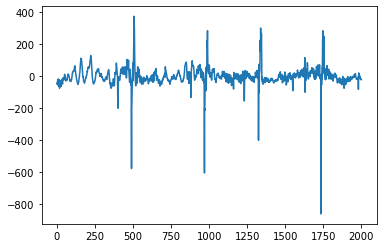

In [41]:
plt.plot(EEG_resp[rc, dat_plot.Num.values.astype('int')[j],:])

In [56]:
np.max(LL_all.d)

53.38

In [45]:
EEG_resp.shape

(118, 845, 2000)

2 Post_late


Text(0.5, 1.0, 'Post_late')

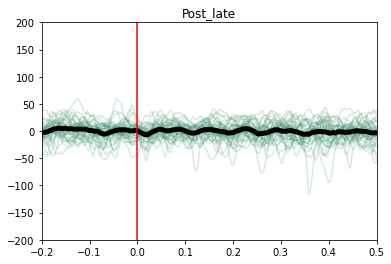

In [51]:
dat_plot = dat[(dat.Condition==c)]

print(i,c)
for j in range(len(dat_plot.Num.values.astype('int'))):
    plt.plot(x_ax, EEG_resp[rc, dat_plot.Num.values.astype('int')[j],:],color=color_elab[i], alpha=0.2)
plt.plot(x_ax, np.mean(EEG_resp[rc, dat_plot.Num.values.astype('int'),:],0),color=[0,0,0], linewidth=5)
ylim_mx = np.max([ylim_mx, np.max(np.mean(EEG_resp[rc, dat_plot.Num.values.astype('int'),500:750],0))])
ylim_mn = np.min([ylim_mn, np.min(np.mean(EEG_resp[rc, dat_plot.Num.values.astype('int'),500:750],0))])
plt.xlim([-0.2, 0.5])
plt.axvline(0, color=[1,0,0])
plt.ylim([-200,200])
if i==0:
    plt.xlabel('time [s]')
    plt.ylabel('[uV]')
plt.title(c)

In [60]:
dat_plot

Chan  Stim         LL         P2P      type Condition  Artefact  Int  \
2603   3.0  81.0   8.700673  603.302080  LTP50_SP       Pre       0.0  3.0   
2606   3.0  81.0  10.625714  507.272452  LTP50_SP       Pre       0.0  3.0   
2609   3.0  81.0  11.637106  675.744432  LTP50_SP       Pre       0.0  3.0   
2612   3.0  81.0  11.676344  721.878608  LTP50_SP       Pre       0.0  3.0   
2615   3.0  81.0  11.120288  659.493205  LTP50_SP       Pre       0.0  3.0   
...    ...   ...        ...         ...       ...       ...       ...  ...   
2890   3.0  81.0   7.948010  490.862977  LTP50_SP       Pre       0.0  3.0   
2892   3.0  81.0  10.746858  544.219872  LTP50_SP       Pre       0.0  3.0   
2896   3.0  81.0   8.878346  590.893771  LTP50_SP       Pre       0.0  3.0   
2899   3.0  81.0   9.938408  537.024720  LTP50_SP       Pre       0.0  3.0   
2902   3.0  81.0   8.493257  445.308682  LTP50_SP       Pre       0.0  3.0   

      Block    Num  Num_block     d  
2603    1.0   68.0       68.0  39.8  
2606    1.0   71.0       71.0  39.8  
2609    1.0   74.0       74.0  39.8  
2612    1.0   77.0       77.0  39.8  
2615    1.0   80.0       80.0  39.8  
...     ...    ...        ...   ...  
2890    1.0  355.0      355.0  39.8  
2892    1.0  357.0      357.0  39.8  
2896    1.0  361.0      361.0  39.8  
2899    1.0  364.0      364.0  39.8  
2902    1.0  367.0      367.0  39.8  

[103 rows x 12 columns]

0 Pre
1 Post_early
2 Post_late


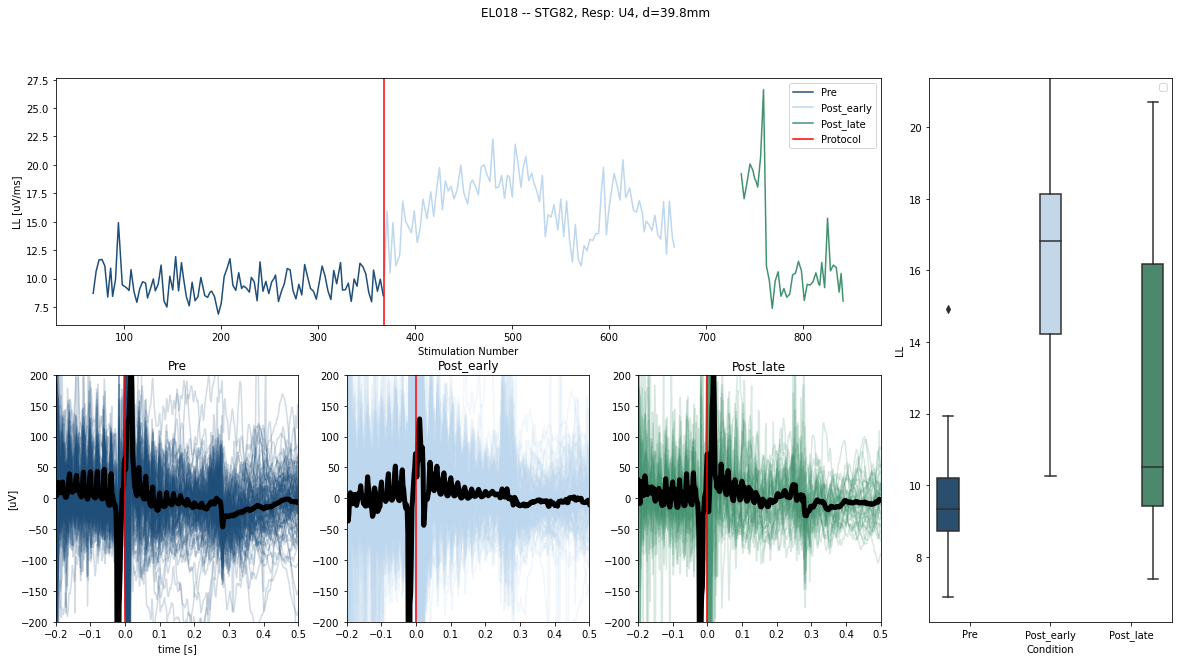

0 Pre
1 Post_early
2 Post_late


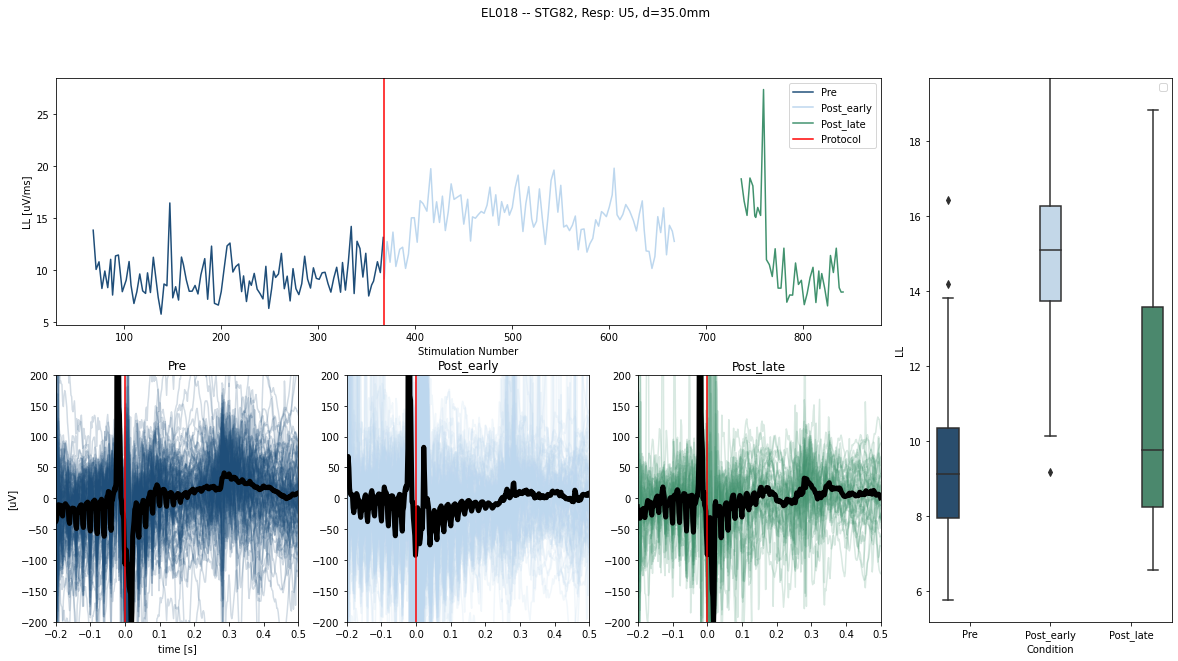

0 Pre
1 Post_early
2 Post_late


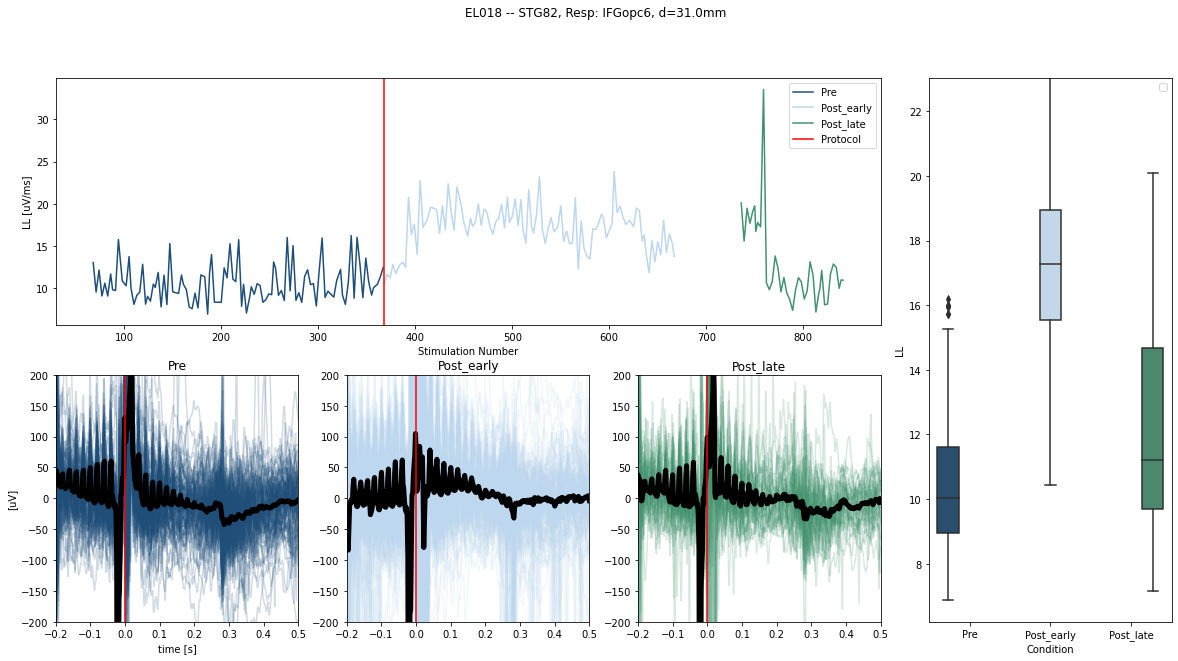

0 Pre
1 Post_early
2 Post_late


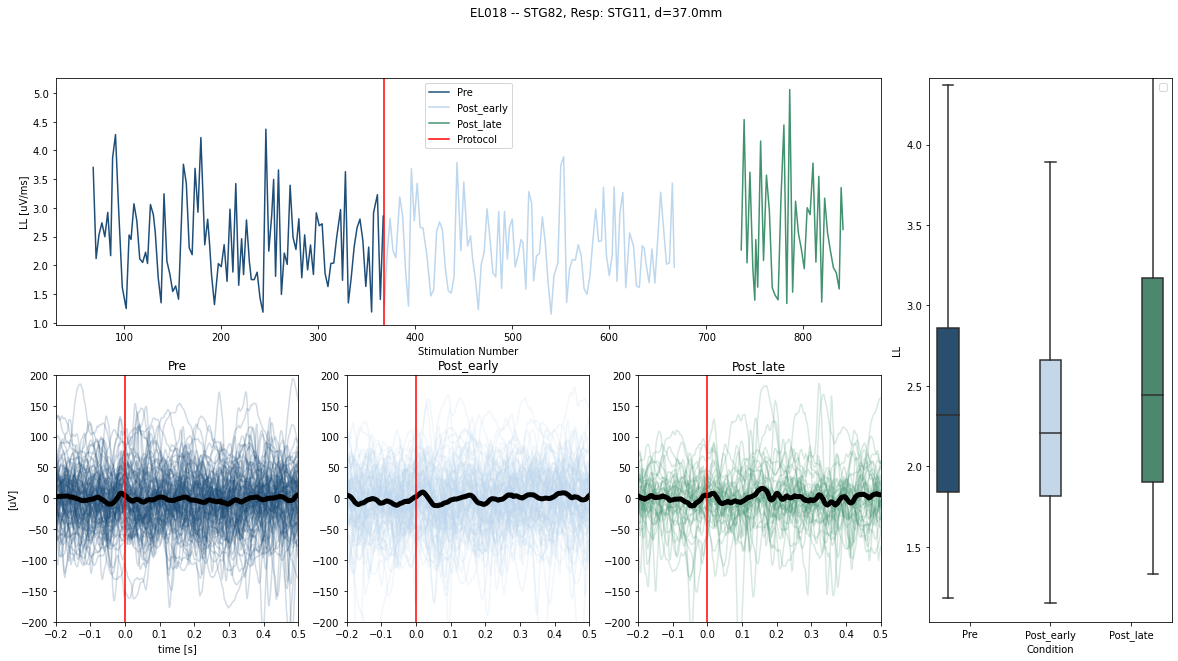

0 Pre
1 Post_early
2 Post_late


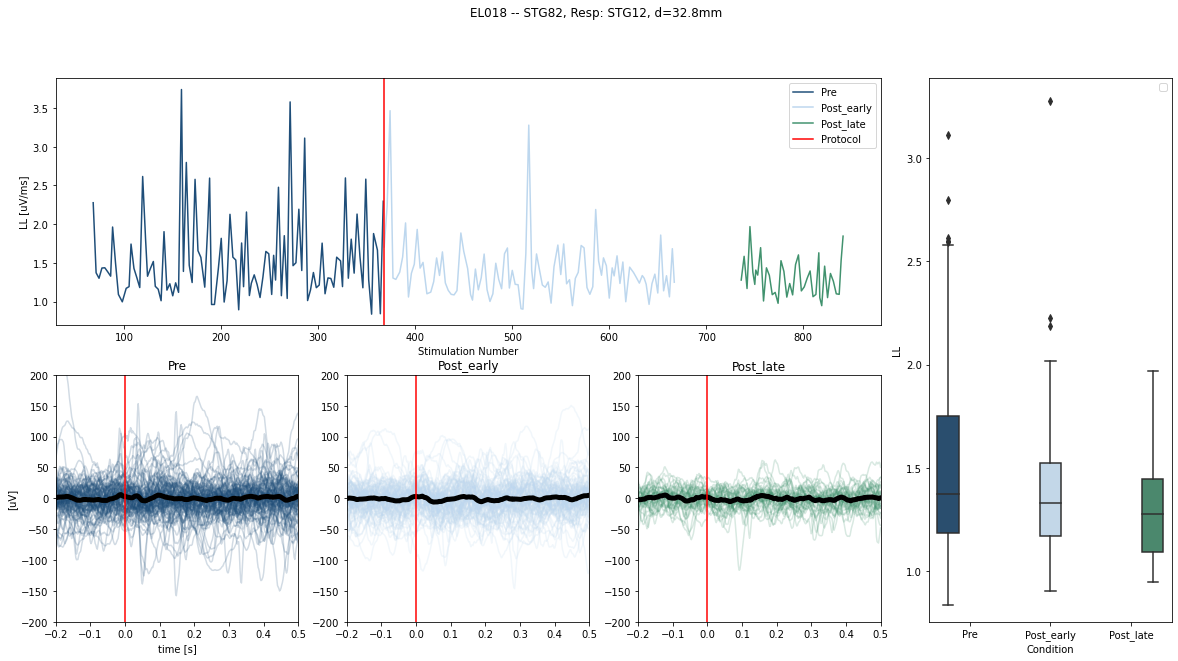

0 Pre
1 Post_early
2 Post_late


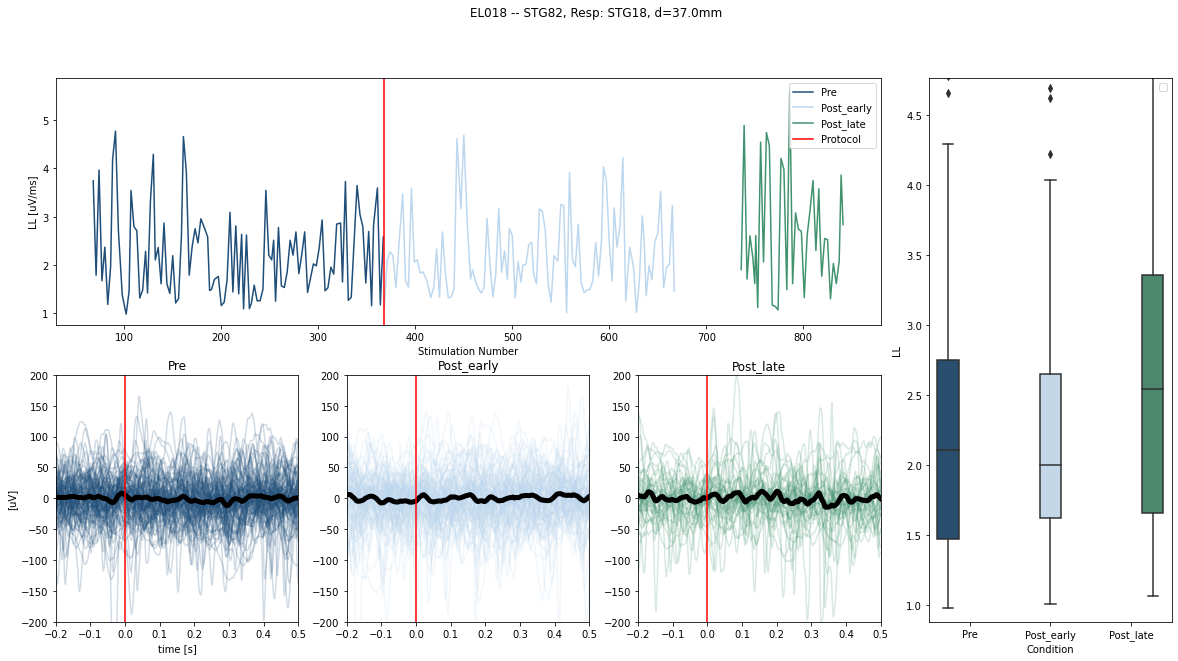

0 Pre
1 Post_early
2 Post_late


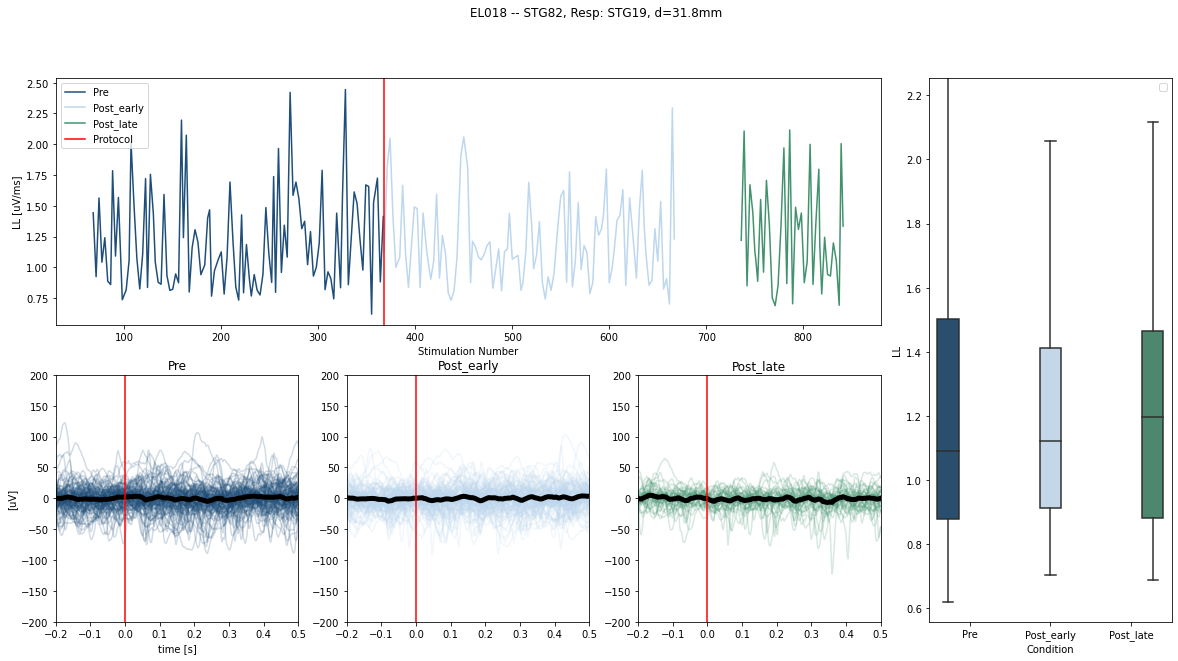

0 Pre
1 Post_early
2 Post_late


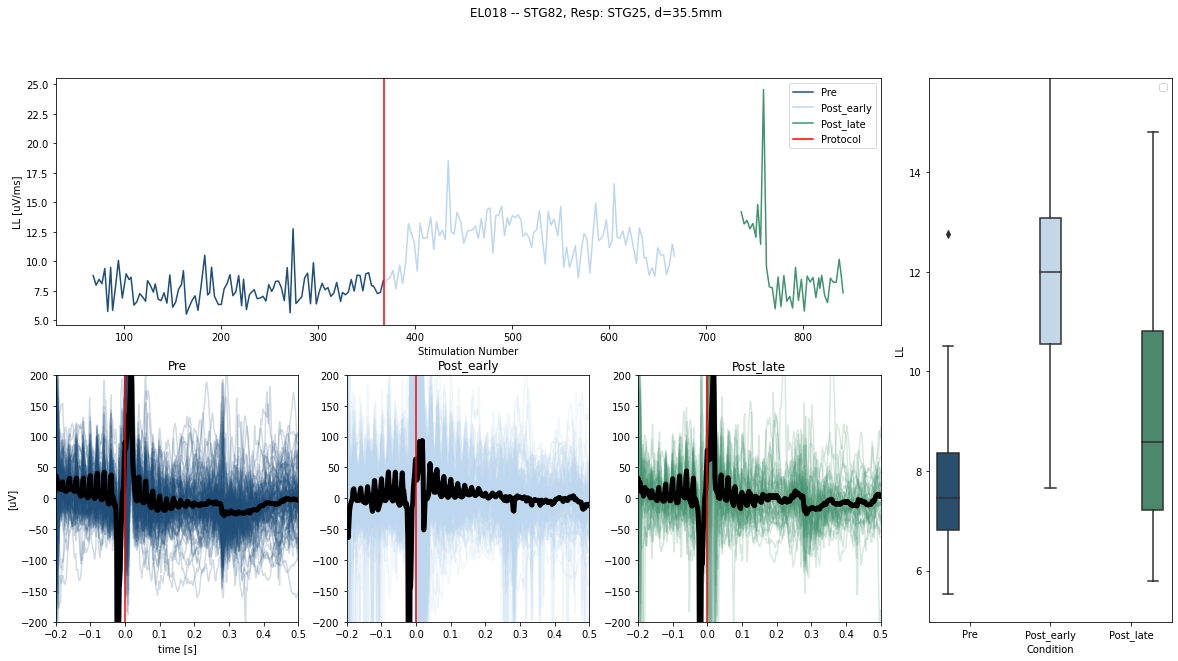

0 Pre
1 Post_early
2 Post_late


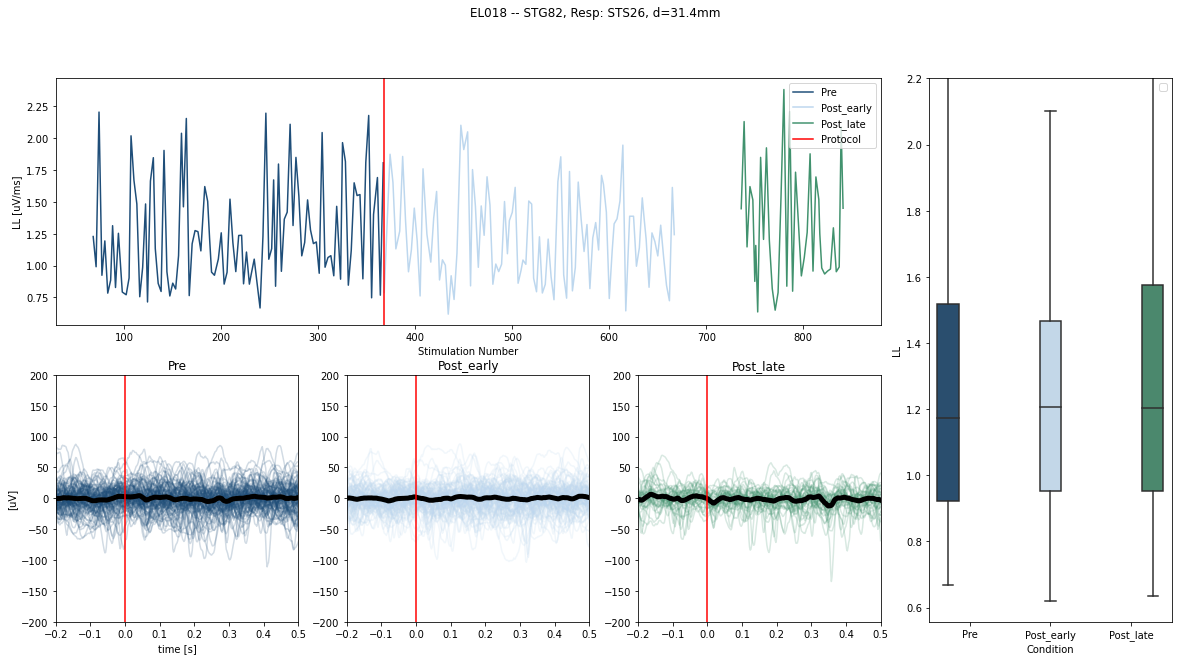

0 Pre
1 Post_early
2 Post_late


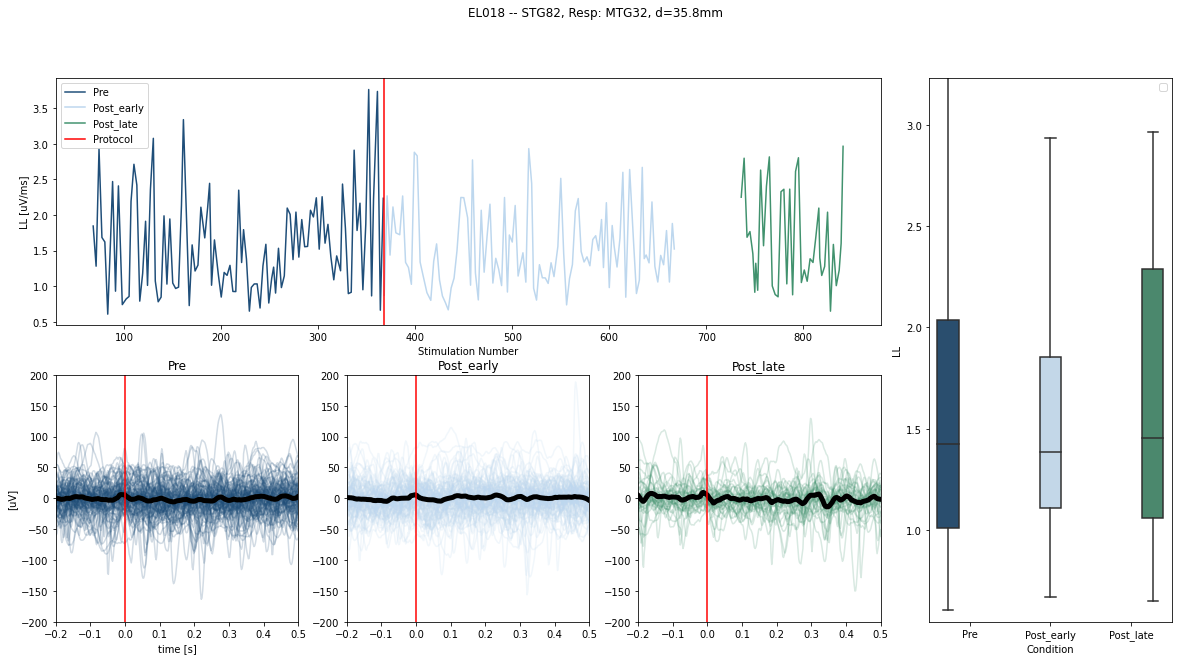

0 Pre
1 Post_early
2 Post_late


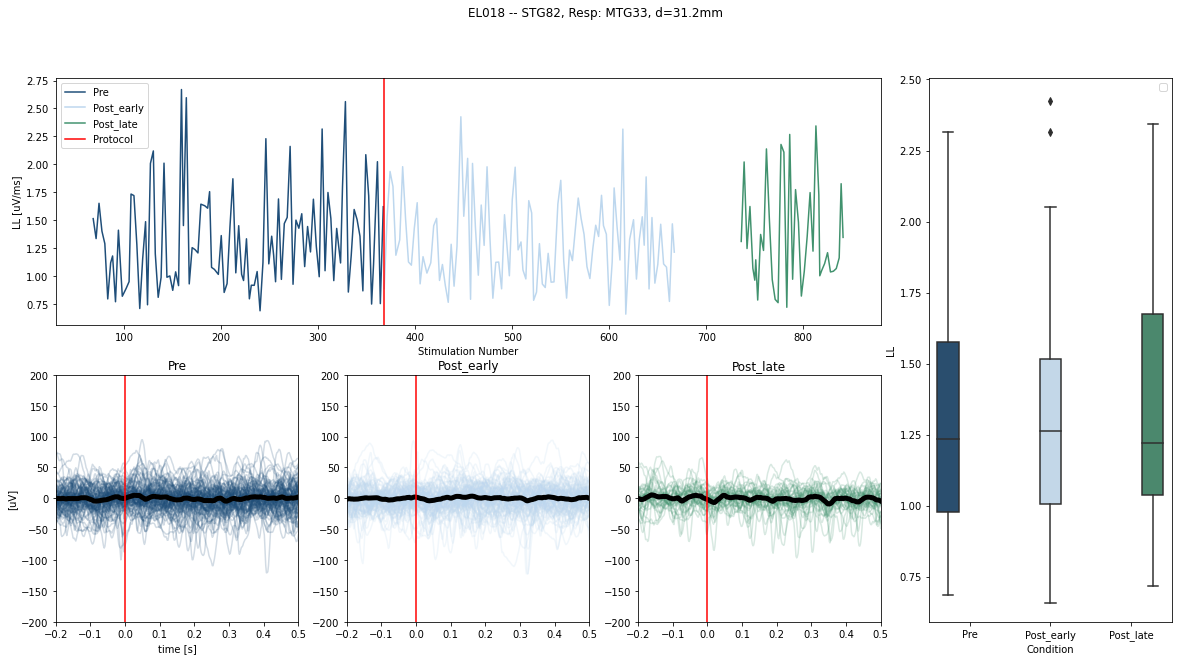

0 Pre
1 Post_early
2 Post_late


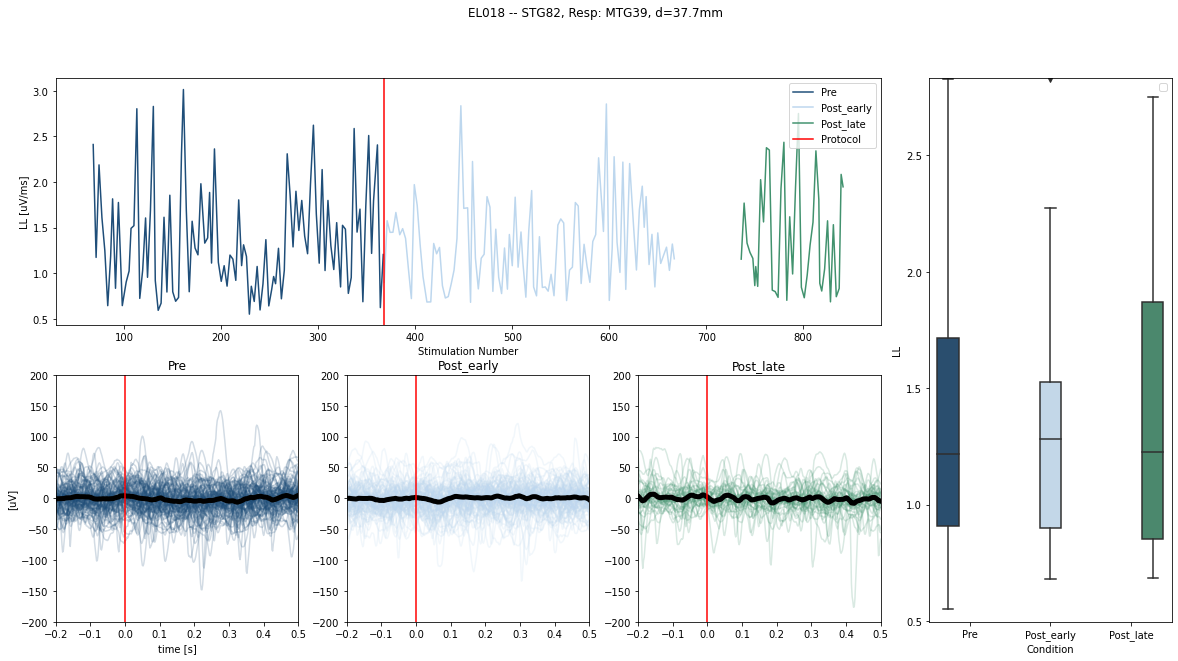

0 Pre
1 Post_early
2 Post_late


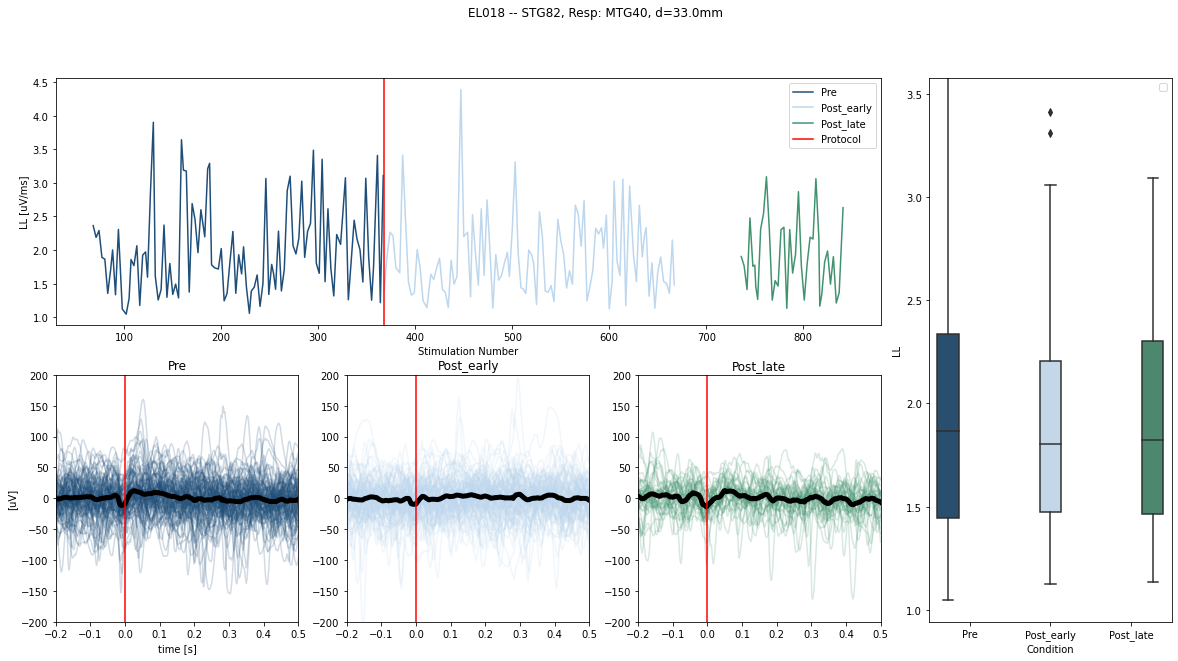

0 Pre
1 Post_early
2 Post_late


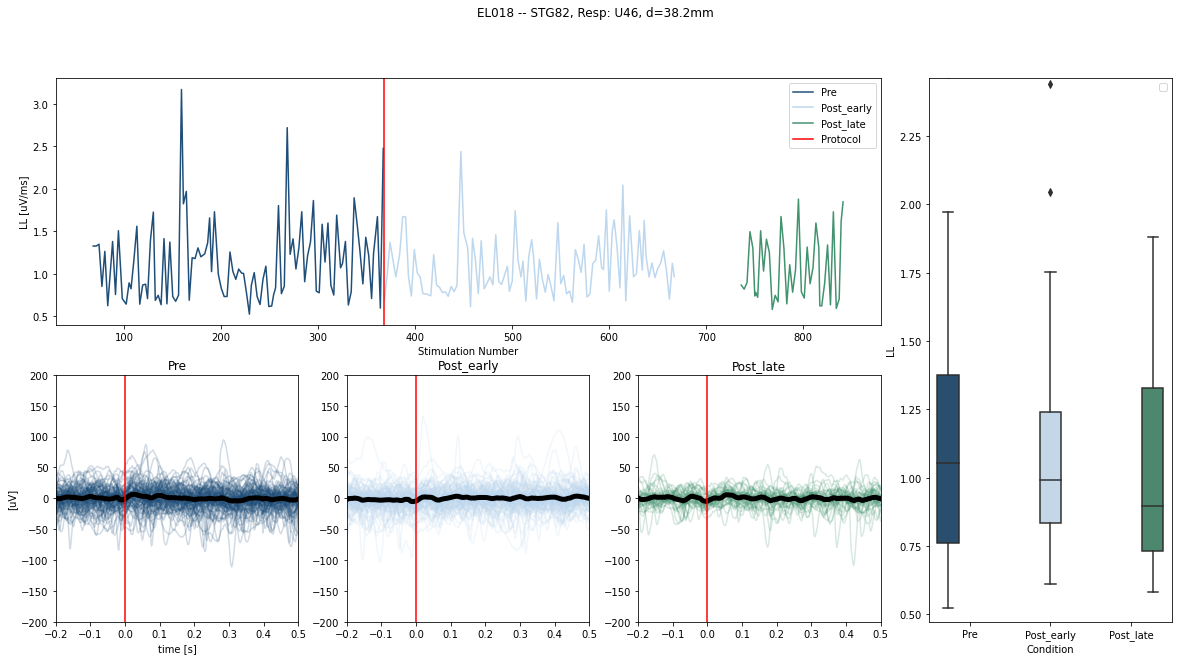

0 Pre
1 Post_early
2 Post_late


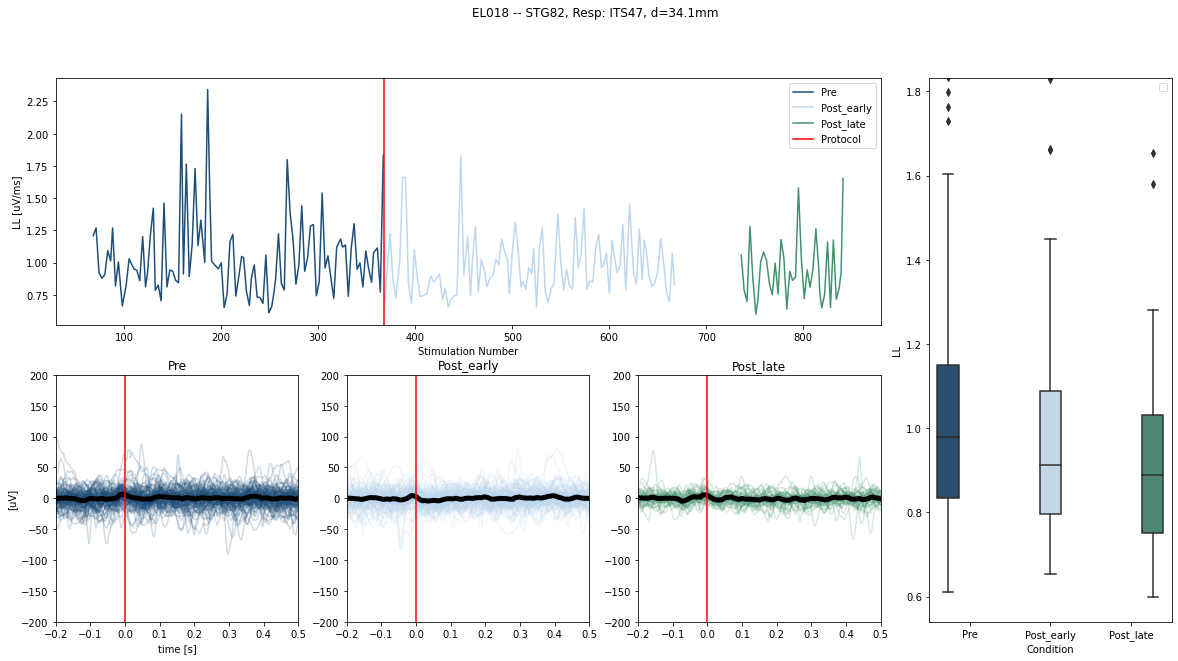

0 Pre
1 Post_early
2 Post_late


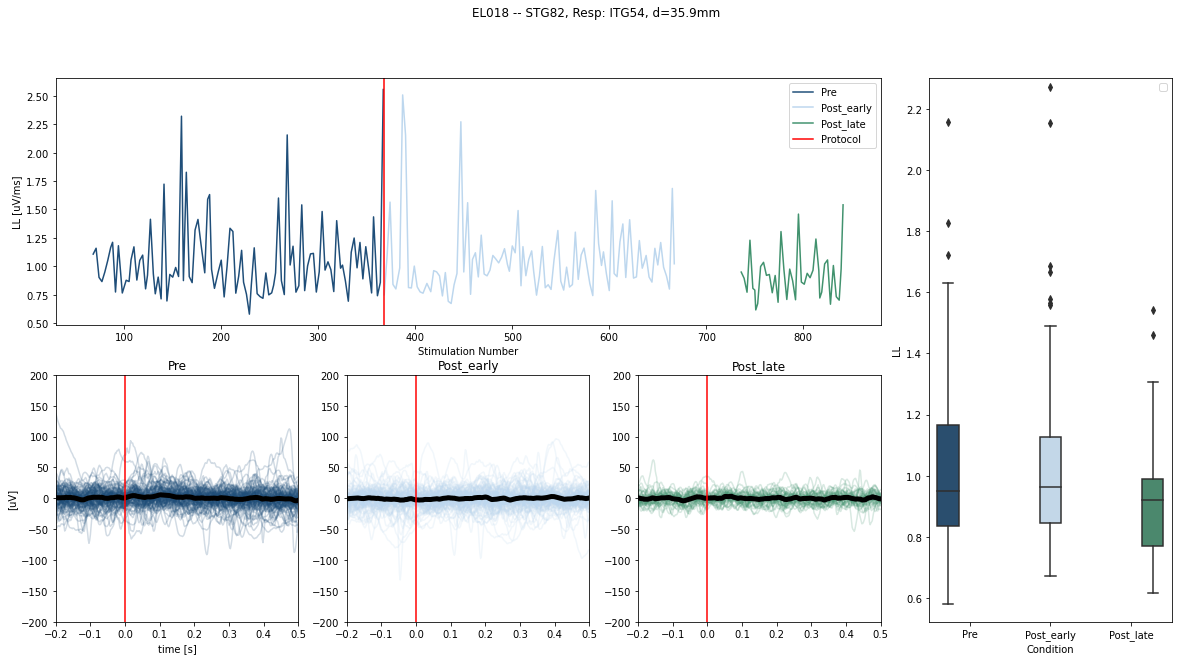

0 Pre
1 Post_early
2 Post_late


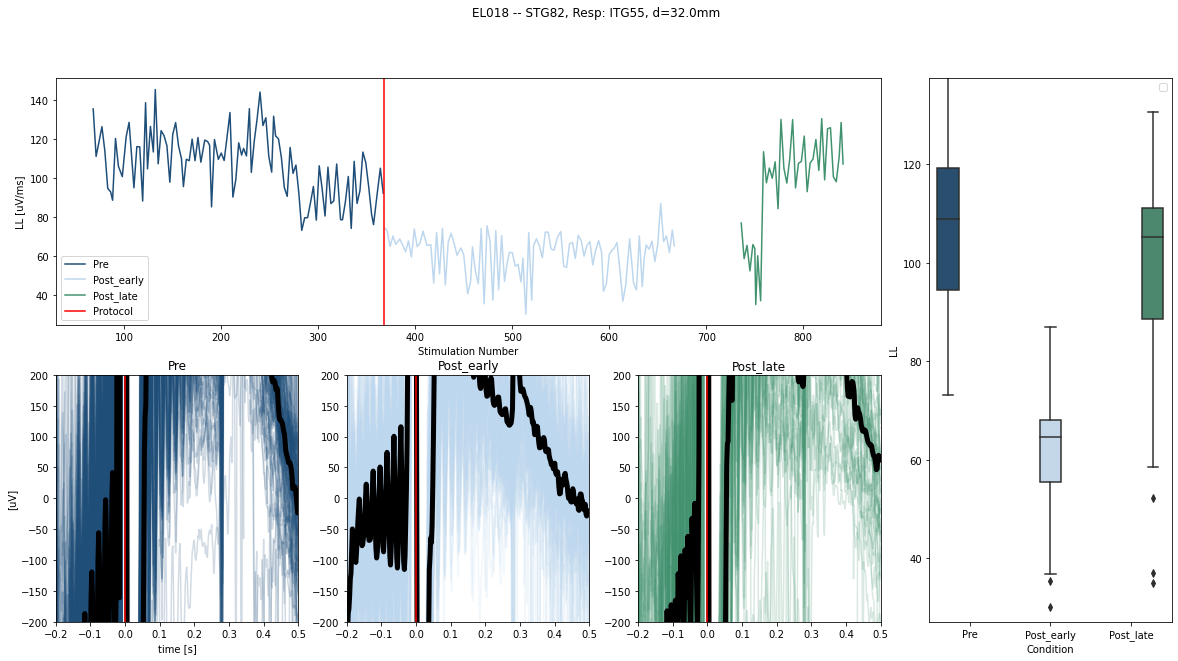

0 Pre
1 Post_early
2 Post_late


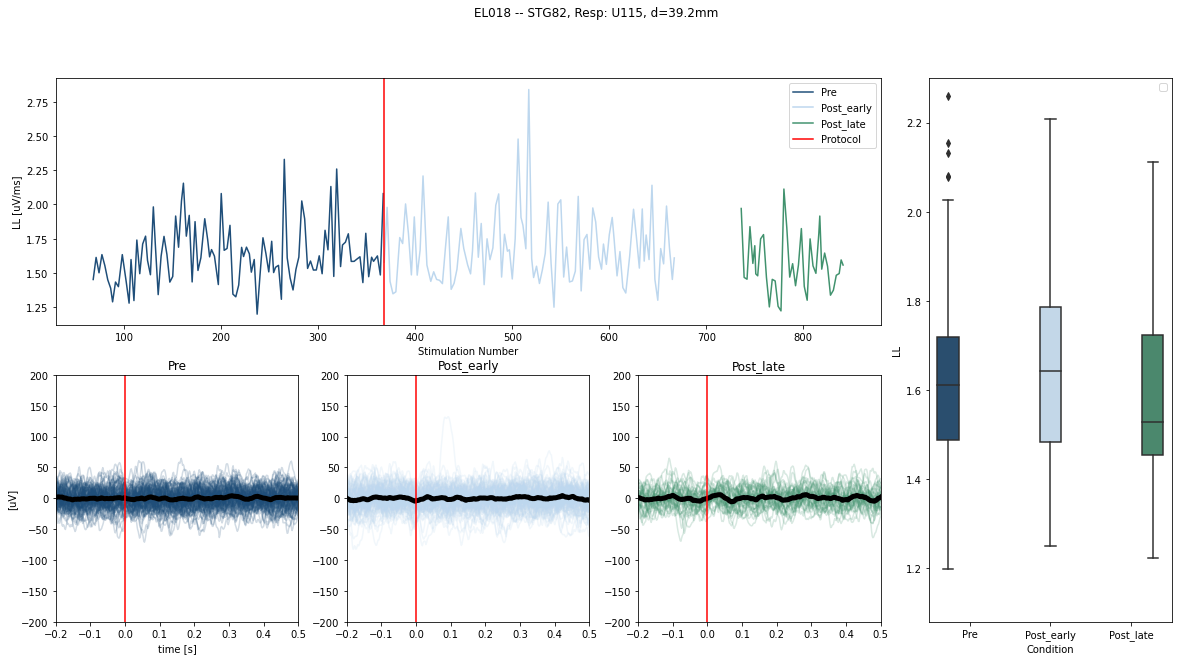

In [73]:
# select data for specific response channel (rc)
rc = 24 # rc+1
for rc in np.unique(LL_all.loc[(LL_all.d>30)&(LL_all.d<40),'Chan']).astype('int'):
    dat      = LL_all[(LL_all['type']=='LTP50_SP')&(LL_all['Proc_num']==1)&(LL_all['Artefact']==0)&(LL_all['Chan']==rc)] #(LL_all['Stim']>32)& #&(LL_all['Sig_Con']>0)
    sc = int(dat.Stim.values[0])

    fig      = plt.figure(figsize=(20,10), facecolor='w', edgecolor='k')
    plt.suptitle(subj+' -- '+labels_all[np.int64(sc)]+', Resp: '+labels_all[np.int64(rc)]+', d='+str(np.round(np.mean(dat.d),1))+'mm')    #
    gs       = fig.add_gridspec(2,4)  # GridSpec(4,1, height_ratios=[1,2,1,2])
    fig.add_subplot(gs[0, 0:3])
    for c,i in zip(cond_labels, cond_vals):
        dat_plot = dat[(dat.Condition==c)]
        plt.plot(dat_plot.Num, dat_plot.LL, color=color_elab[i], label=c)
    plt.xlabel('Stimulation Number')
    plt.ylabel('LL [uV/ms]')
    plt.axvline(np.max(dat.loc[(dat.Block==1),'Num'])+0.5, color=[1,0,0], label='Protocol')
    plt.legend()  
    ylim_mn = -100
    ylim_mx = 100
    for c,i in zip(cond_labels, cond_vals):

        dat_plot = dat[(dat.Condition==c)]

        print(i,c)
        ax = fig.add_subplot(gs[1, i])
        for j in range(len(dat_plot.Num.values.astype('int'))):
            plt.plot(x_ax, EEG_resp[rc, dat_plot.Num.values.astype('int')[j],:],color=color_elab[i], alpha=0.2)
        plt.plot(x_ax, np.mean(EEG_resp[rc, dat_plot.Num.values.astype('int'),:],0),color=[0,0,0], linewidth=5)
        ylim_mx = np.max([ylim_mx, np.max(np.mean(EEG_resp[rc, dat_plot.Num.values.astype('int'),500:750],0))])
        ylim_mn = np.min([ylim_mn, np.min(np.mean(EEG_resp[rc, dat_plot.Num.values.astype('int'),500:750],0))])
        plt.xlim([-0.2, 0.5])
        plt.axvline(0, color=[1,0,0])
        plt.ylim([-200,200])
        if i==0:
            plt.xlabel('time [s]')
            plt.ylabel('[uV]')
        plt.title(c)
    #for i in range(len(cond_labels)):
    #    fig.add_subplot(gs[1, i])
    #    plt.ylim([1.3*ylim_mn, 1.5*ylim_mx])

    fig.add_subplot(gs[:, 3])
    sns.boxplot(x='Condition', y='LL', data = dat, hue = 'Condition', palette=color_elab)    
    plt.xticks(np.arange(np.max(cond_vals)+1),cond_labels)
    plt.ylim([0.9*np.min(dat.LL),np.percentile(dat.LL,99)])
    plt.legend([])
    plt.show()

In [ ]:
np.size(x_ax)

## Input Output

### LL on mean CCEP(n=5 per block)

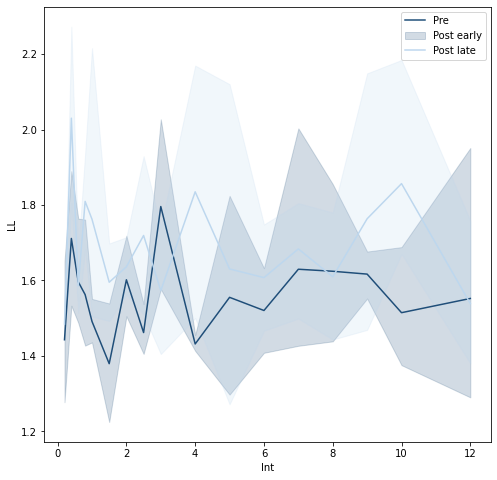

In [75]:
## mean LL of single trials LL  grouped based on condition

datIO      = LL_all[(LL_all['LL']<8)&(LL_all['type']=='LTP50_IO')&(LL_all['Artefact']==0)&(LL_all['Chan']==rc)] #(LL_all['Stim']>32)& #&(LL_all['Sig_Con']>0)
sc = int(datIO.Stim.values[0])
palette = sns.color_palette(color_elab[:2])
plt.figure(figsize=(8,8))
sns.lineplot(x='Int', y='LL', data=datIO, hue='Condition', palette = palette)
plt.legend(cond_label[:3])


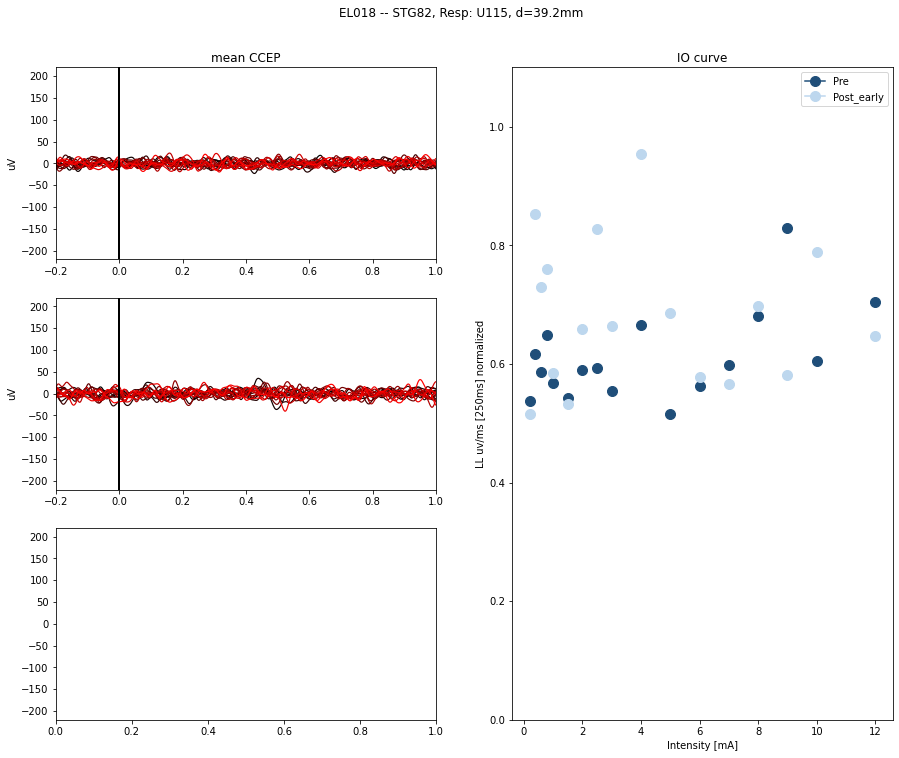

In [78]:
## LL of mean CCEP (slighlty different)
sc = int(datIO.Stim.values[0])
plot_raw_LL_IO_LTI(sc, rc, datIO,EEG_resp,labels_all)

In [77]:
def plot_raw_LL_IO_LTI(sc, rc, LL_all,EEG_resp,labels_all):
    dat      = LL_all[(LL_all['Stim']==sc)&(LL_all['Chan']==rc)]
    w        = 0.25
    fig, axs = plt.subplots(len(cond_vals),2, figsize=(15, 8), facecolor='w', edgecolor='k')
    axs     = axs.ravel()
    plt.close(fig) # todo: find better solution
    fig      = plt.figure(figsize=(15,len(cond_vals)*4), facecolor='w', edgecolor='k')
    #
    gs       = fig.add_gridspec(len(cond_vals),2)  # GridSpec(4,1, height_ratios=[1,2,1,2])
    for n in cond_vals:
        axs[n] = fig.add_subplot(gs[n, 0])

    axIO   = fig.add_subplot(gs[:, 1])
    plt.suptitle(subj+' -- '+labels_all[np.int64(sc)]+', Resp: '+labels_all[np.int64(rc)]+', d='+str(np.round(np.mean(dat.d),1))+'mm', y=0.95)
    limy_LL          = 3 # limits for LL plot
    limy_mx        = 200
    limy_mn        = -200
    Int_selc         = np.unique(dat.Int)
    colors_Int       = np.zeros((len(Int_selc), 3))
    colors_Int[:, 0] = np.linspace(0, 1, len(Int_selc))
    mx_LL =1
    for c,j in zip(cond_labels, cond_vals):
        Int_selc = np.unique(dat.loc[(dat.Stim==sc)&(dat.Chan==rc)&(dat.Condition==c), 'Int'])
        for i in range(len(Int_selc)):
            dati = dat[(dat.Int==Int_selc[i])&(dat.Stim==sc)&(dat.Chan==rc)&(dat.Condition==c)]
            if len(dati)>0:
                resp             = ff.lp_filter(np.nanmean(EEG_resp[rc,dati.Num.values.astype('int'),: ], 0),45,Fs)
                LL_resp = LLf.get_LL_all(np.expand_dims(resp,[0,1]), Fs, 0.25)[0][0]

                LL_resp             = ff.lp_filter(LL_resp,20,Fs)
                axs[j].plot( x_ax,resp, c = colors_Int[i], linewidth= 1.2)
                axs[j].set_xlim(-0.2, 0.5)
                # axs[1].plot( x_ax,LL_resp, c = colors_Int[i], linewidth= 1.2)
                mx = np.max(LL_resp[500:750])
                mx_t = np.argmax(LL_resp[500:750]) /Fs
                # axs[1].plot(mx_t,mx, marker='o', c = [0,0,0], markersize= 10)

                
                if i == len(Int_selc)-1:
                    axIO.plot(Int_selc[i], mx, marker='o', markersize=10, c = color_elab[j], label=c)
                else:
                    axIO.plot(Int_selc[i], mx, marker='o', markersize=10, c = color_elab[j])
                limy_mx = np.nanmax([limy_mx, np.max(resp[500:750])])
                limy_mn = np.nanmin([limy_mn, np.min(resp[500:750])])
                mx_LL = np.max([mx_LL, mx])
                axs[j ].axvline(0, c=[0,0,0])   
                axs[j].set_xlim(-0.2, 1)
                axs[j].set_ylabel('uV')


    axIO.set_title('IO curve')
    axIO.set_ylabel('LL uv/ms [250ms] normalized')
    axIO.set_xlabel('Intensity [mA]')
    axIO.set_ylim([0,1.1*mx_LL])
    axIO.legend()

    axs[0].set_title('mean CCEP')

    
    # axs[1].set_ylabel('uV/ms')
    for n in cond_vals:
        axs[n].set_ylim(1.1*limy_mn,1.1*limy_mx)